In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import os

In [3]:
df = pd.read_csv(os.getcwd() + "\\Desktop\\diamonds.csv")

In [4]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df = df.drop("Unnamed: 0", axis=1)

In [8]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [9]:
print(df[df["x"] == 0].index)

Index([11182, 11963, 15951, 24520, 26243, 27429, 49556, 49557], dtype='int64')


In [10]:
df = df.drop(df[df["x"] == 0].index)

In [11]:
df.describe()

,carat,depth,table,price,x,y,z
count,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000,53932.000000
mean,0.797879,61.749336,57.457029,3932.136079,5.732007,5.735254,3.539259
std,0.473986,1.432514,2.234064,3988.734835,1.119670,1.140343,0.704434
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,949.750000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
df = df.drop(df[df["z"] == 0].index)

In [13]:
df.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


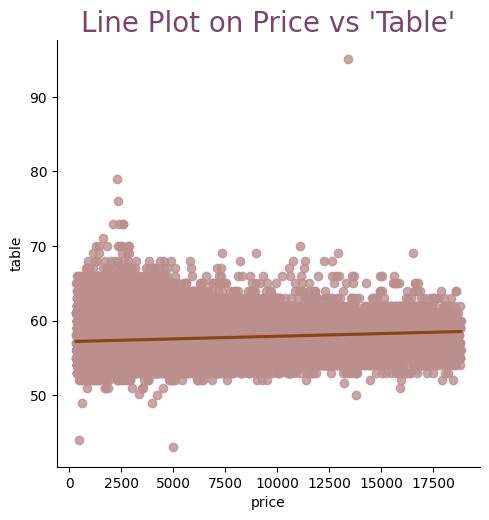

In [14]:
import seaborn as sb
import matplotlib.pyplot as plt
lm = sb.lmplot(x="price", y="table", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [15]:
df = df[(df["table"] < 73) & ( df["table"] > 49)]

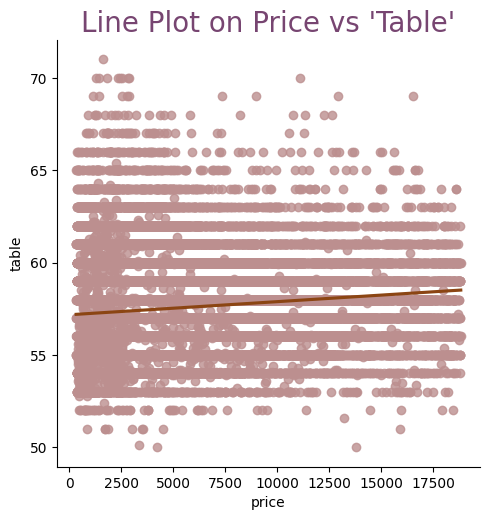

In [16]:
lm = sb.lmplot(x="price", y="table", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

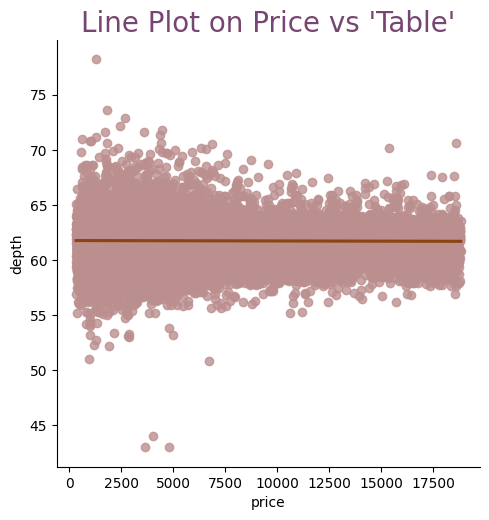

In [17]:
lm = sb.lmplot(x="price", y="depth", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'Table'", color="#774571", fontsize = 20)
plt.show()

In [18]:
df = df[(df["depth"] > 50) & (df["depth"] < 73)]

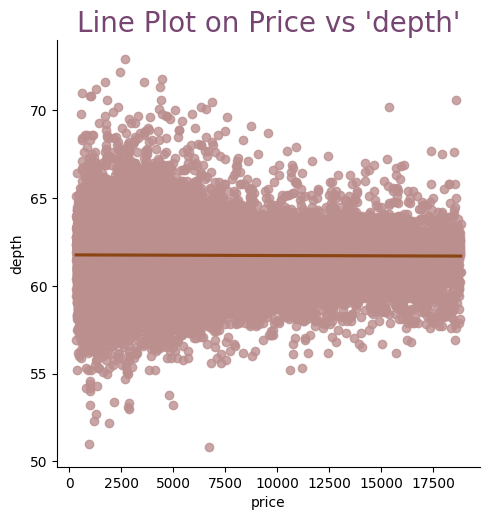

In [19]:
lm = sb.lmplot(x="price", y="depth", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'depth'", color="#774571", fontsize = 20)
plt.show()

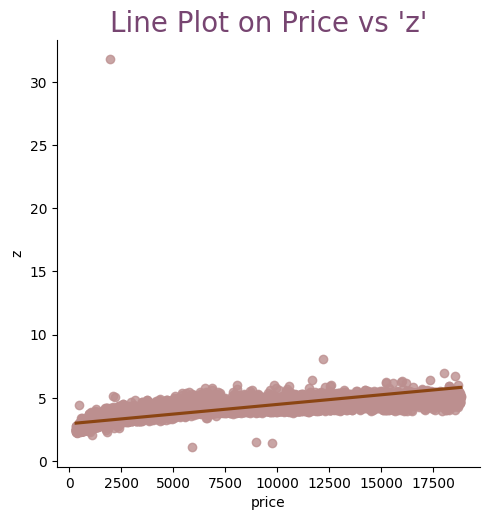

In [20]:
lm = sb.lmplot(x="price", y="z", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'z'", color="#774571", fontsize = 20)
plt.show()

In [21]:
df = df[(df["z"] < 30) & (df["z"] > 2)] 

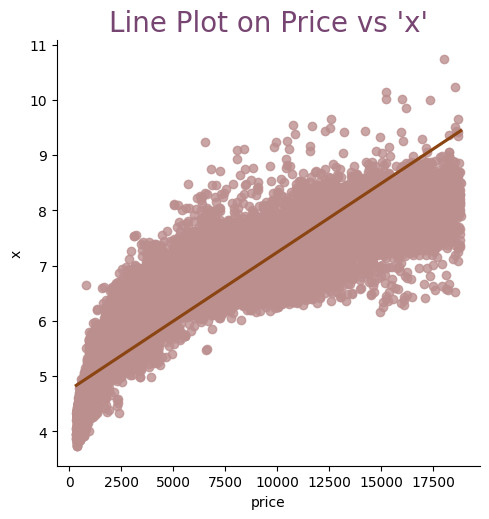

In [22]:
lm = sb.lmplot(x="price", y="x", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'x'", color="#774571", fontsize = 20)
plt.show()

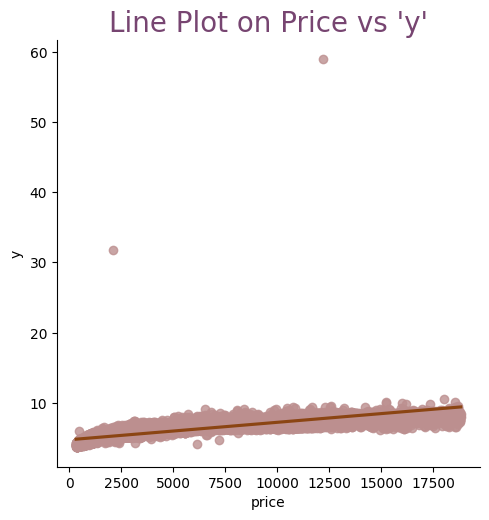

In [23]:
lm = sb.lmplot(x="price", y="y", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

In [24]:
df = df[(df["y"] < 30)]

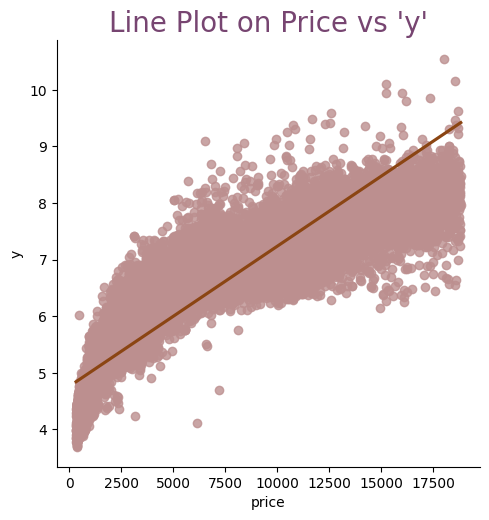

In [25]:
lm = sb.lmplot(x="price", y="y", data=df, scatter_kws={"color": "#BC8F8F"}, line_kws={"color": "#8B4513"})
plt.title("Line Plot on Price vs 'y'", color="#774571", fontsize = 20)
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
Encoder = LabelEncoder()

columns = ["carat", "color", "clarity"]
for col in columns:
    df[col] = Encoder.fit_transform(df[col])

In [28]:
df["cut"] = Encoder.fit_transform(df["cut"])

In [29]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,3,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,1,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,3,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,9,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,11,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,52,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,52,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,50,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,66,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


<Axes: >

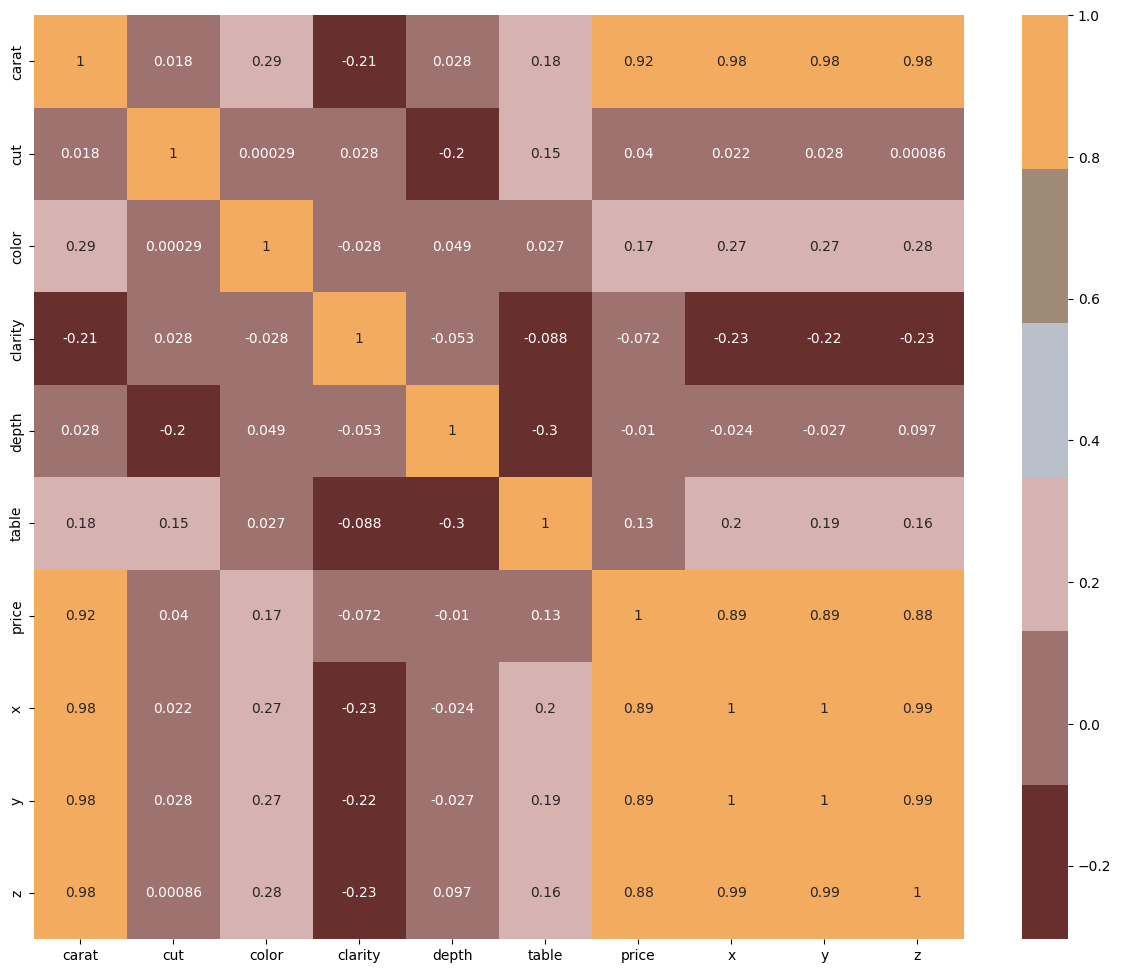

In [30]:
cmap = sb.diverging_palette(205, 133, 63, as_cmap=True)
cols = (["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
corrmat= df.corr()
f, ax = plt.subplots(figsize=(15,12))
sb.heatmap(corrmat,cmap=cols,annot=True)

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
from sklearn.preprocessing import StandardScaler
pipeline_kn = Pipeline([("scaler1", StandardScaler()), ("KN", KNeighborsRegressor())])

In [34]:
pipeline_rf = Pipeline([("scaler2", StandardScaler()), ("RF", RandomForestRegressor(n_estimators=50))])
pipeline_xgb = Pipeline([("scaler3", StandardScaler()), ("XGB", XGBRegressor())])

In [35]:
pipelines = [pipeline_rf, pipeline_kn, pipeline_xgb]
pipeline_dict = {0: "RandomForest",1: "KNeighbors", 2: "XGBRegressor"}

In [36]:
from sklearn.model_selection import train_test_split
X = df.drop("price", axis=1)
Y = df["price"]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [37]:
for p in pipelines:
    p.fit(X_train,Y_train)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [39]:
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,Y_train,scoring="neg_root_mean_squared_error", cv=5)
    cv_results_rms.append(cv_score)
    print("%s: %f " % (pipeline_dict[i], -1 * cv_score.mean()))

RandomForest: 561.063467 
KNeighbors: 834.930992 
XGBRegressor: 559.459322 


In [42]:
pred = pipeline_xgb.predict(X_test)
print("R^2:",metrics.r2_score(Y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(Y_test, pred))*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1))

R^2: 0.9811416268348694
Adjusted R^2: 0.981125867748659
